In [1]:
%matplotlib notebook
import numpy as np
import nibabel as nib
import sigpy.plot as pl
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import lagrange
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_widths
from numpy.polynomial.polynomial import Polynomial

In [4]:
#Load registered image
registered = nib.load("result_nomask.nii")
registered = np.array(registered.dataobj)

<IPython.core.display.Javascript object>


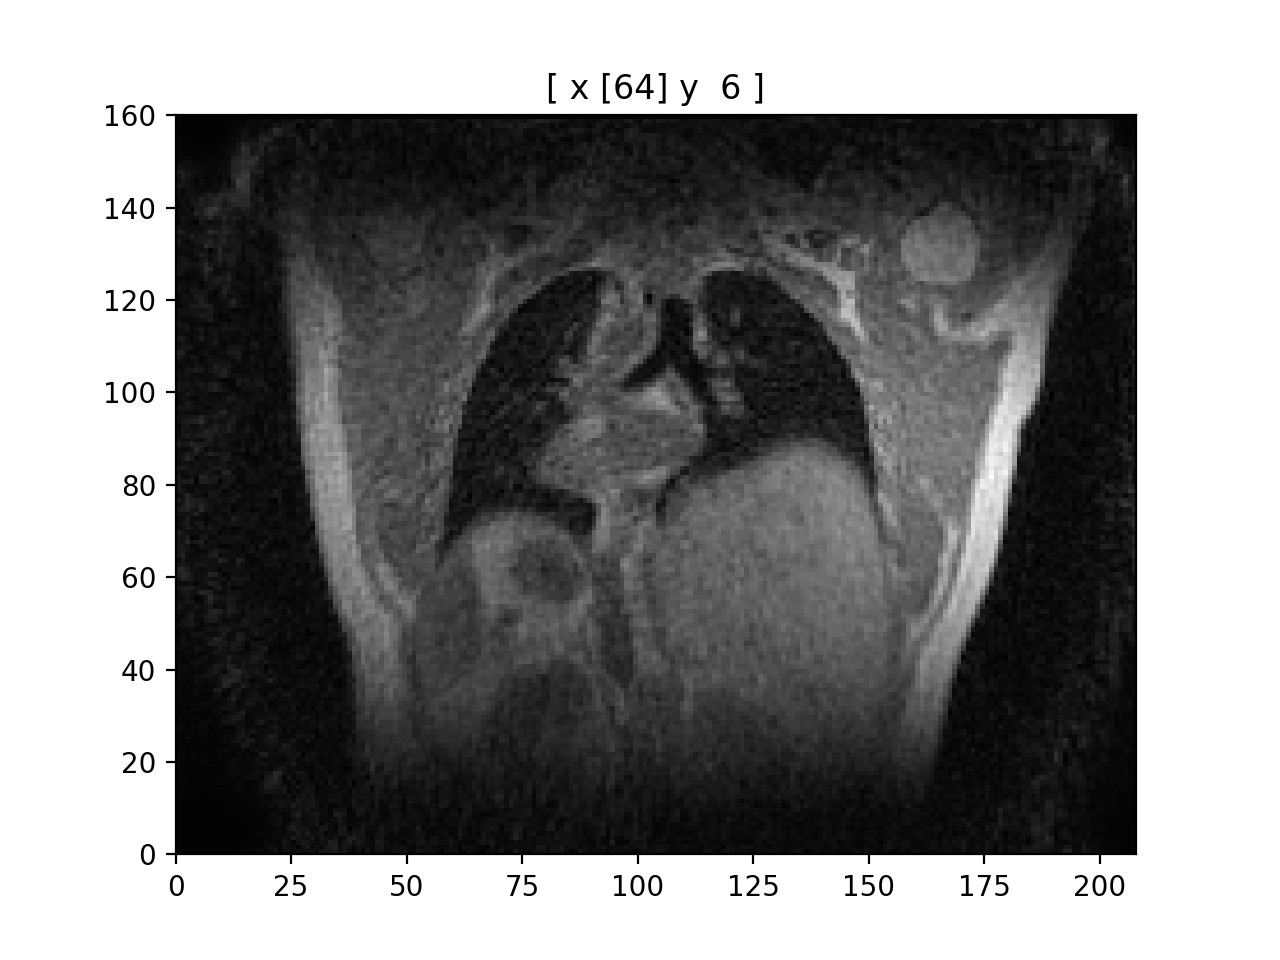

In [5]:
#Plot registered image
pl.ImagePlot(registered, x=0)

In [2]:
#Load lung mask 
mask = nib.load("lung_mask_close.nii")
mask = np.array(mask.dataobj)

<IPython.core.display.Javascript object>


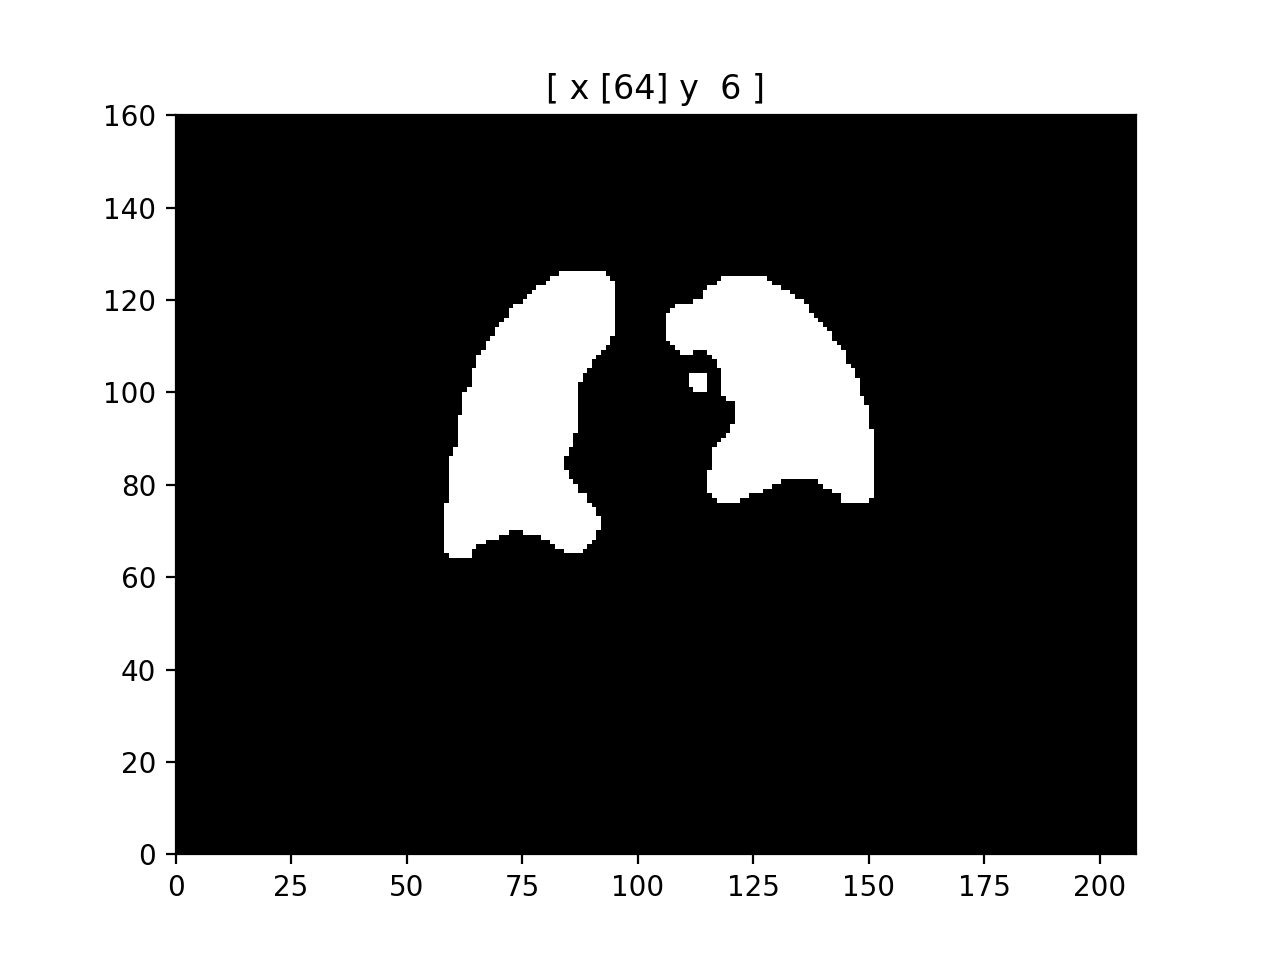

In [3]:
#Plot lung mask
pl.ImagePlot(mask, x=0)

<IPython.core.display.Javascript object>


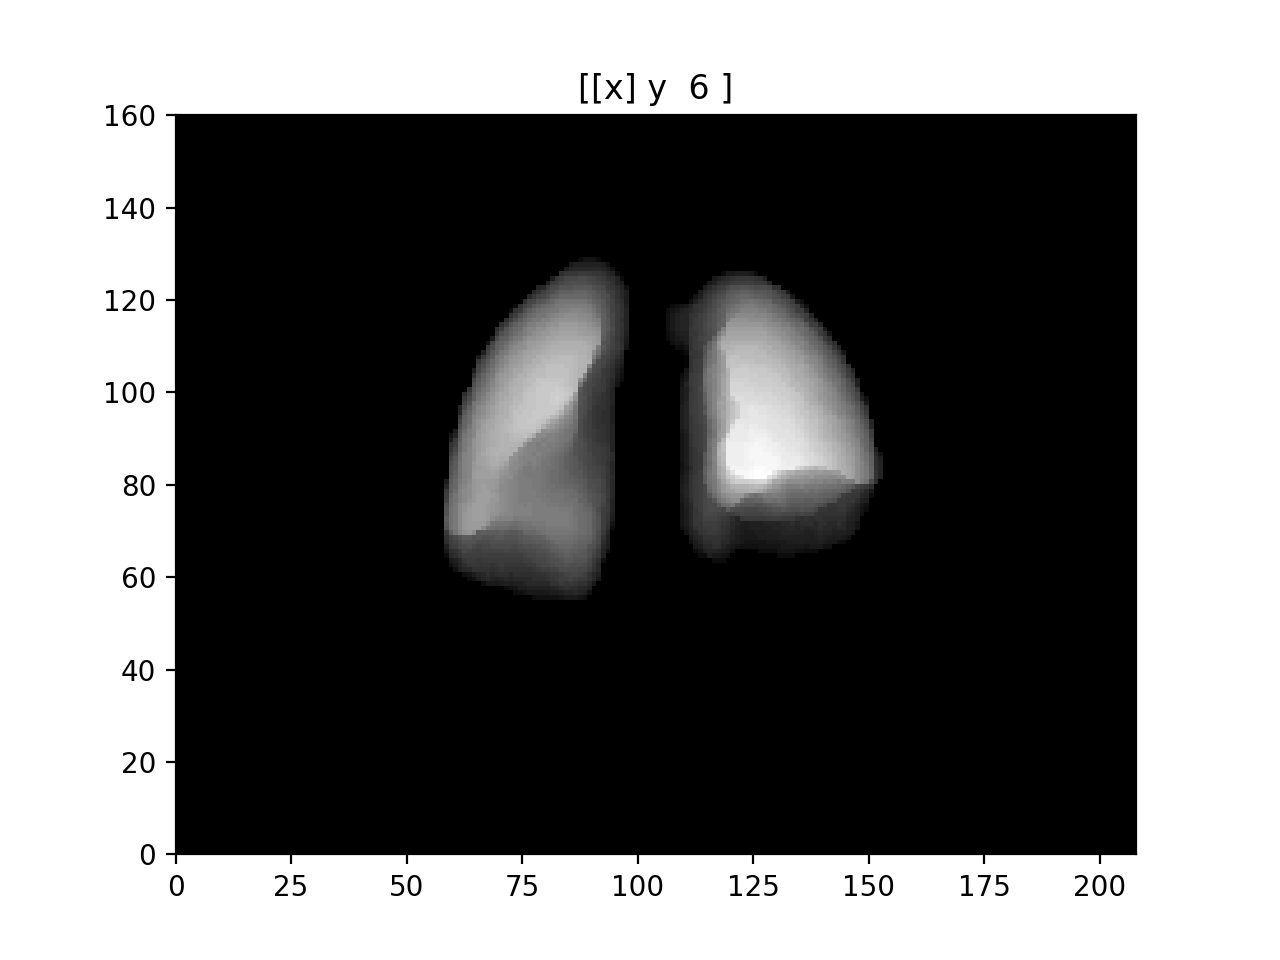

In [17]:
#Plot lung mask image in '3D'
pl.ImagePlot(np.mean(mask, axis=1), mode='r', x=0)

<h1>Lung Mask Voxel Sample<h1>

In [11]:
#Multiply lung mask with registered image 
registered_mask = np.empty((208, 128, 160, 12))
for i in range(12):
    registered_mask[:,:,:,i] = np.multiply(registered[:,:,:,i], mask[:,:,:,i])

<IPython.core.display.Javascript object>


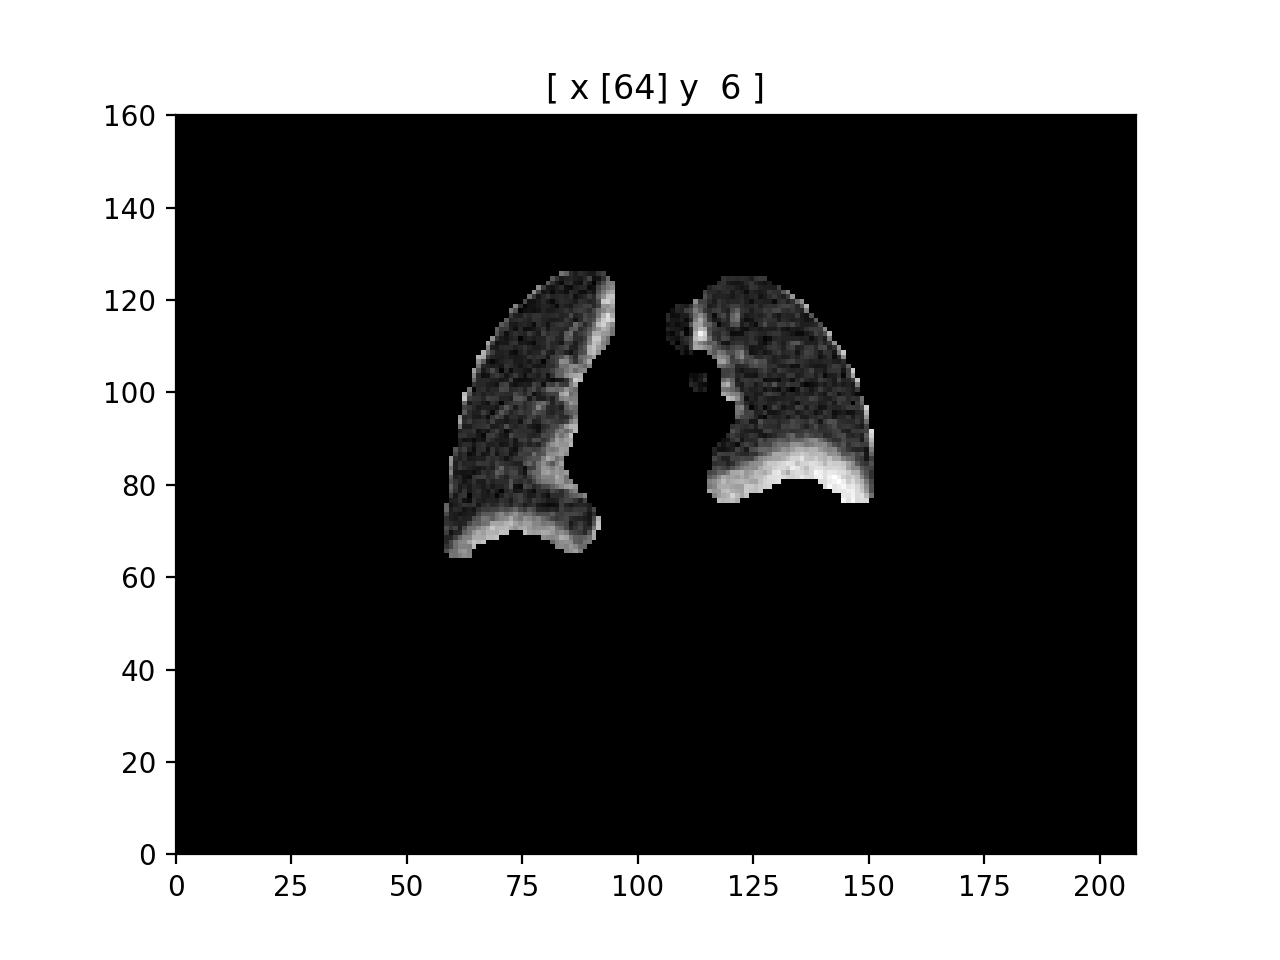

In [12]:
#Plot registered lung mask image
pl.ImagePlot(registered_mask, x=0)

In [19]:
#Generate a voxel sample given a size 
def voxel_sample(img, voxel_size):
    size = voxel_size
    x = img.shape[0] // size
    y = img.shape[1] // size
    z = img.shape[2] // size
    t = img.shape[3]
    sample = np.empty((x,y,z,t))

    for i in range(x):
        for j in range(y):
            for k in range(z):
                for l in range(t):
                    sample[i, j, k, l] = np.mean(img[i*size:(i+1)*size, j*size:(j+1)*size, k*size:(k+1)*size, l:l+1])
    return sample

In [20]:
#Calculate 8, 4, 2 voxel sample
voxel_sample_8 = voxel_sample(registered_mask, 8)
voxel_sample_4 = voxel_sample(registered_mask, 4)
voxel_sample_2 = voxel_sample(registered_mask, 2)

<IPython.core.display.Javascript object>


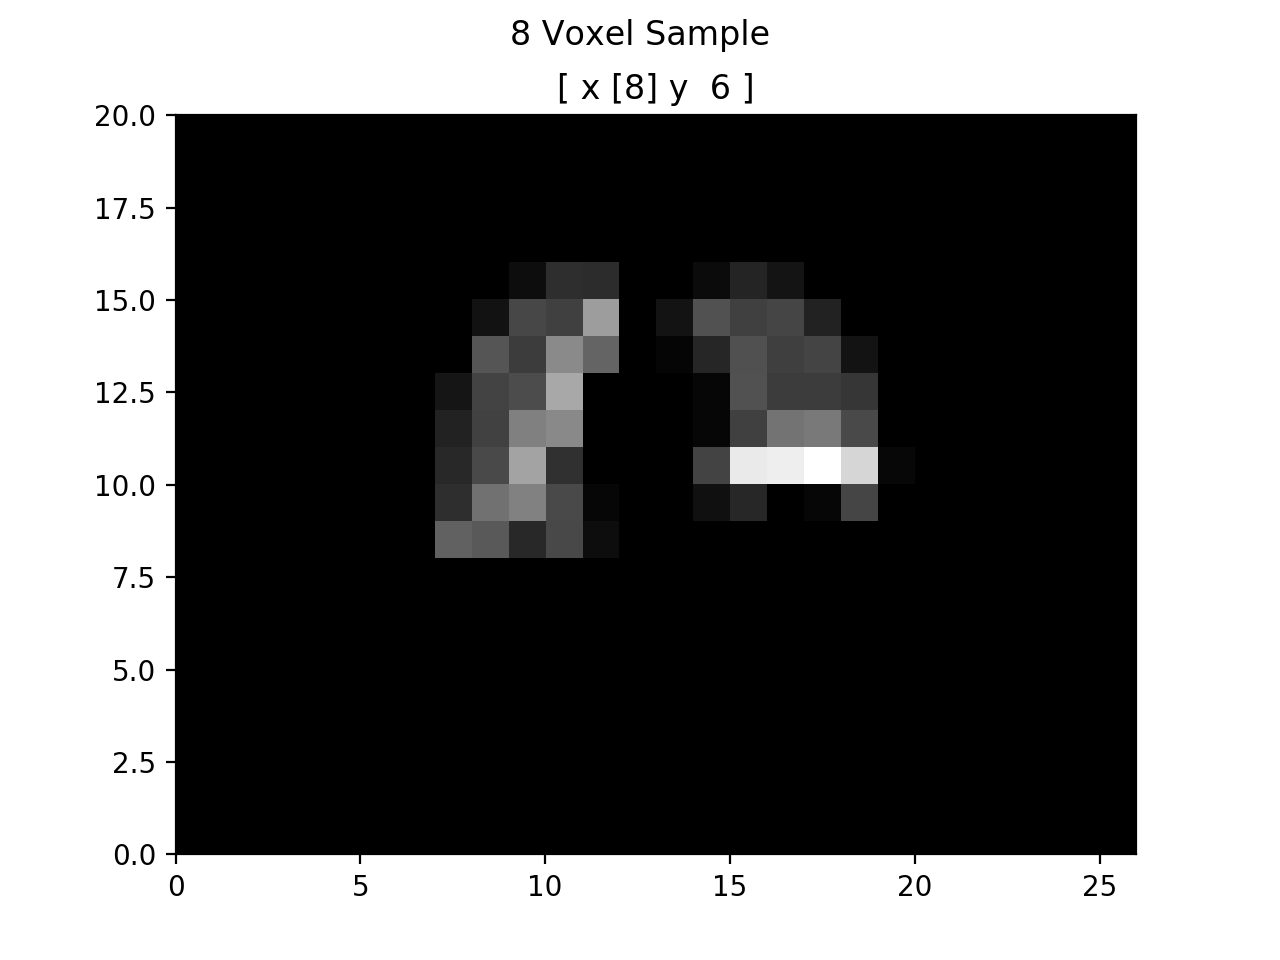

In [21]:
#Plot 8x8x8 voxel sample image
pl.ImagePlot(voxel_sample_8, x=0, title='8 Voxel Sample')

<IPython.core.display.Javascript object>


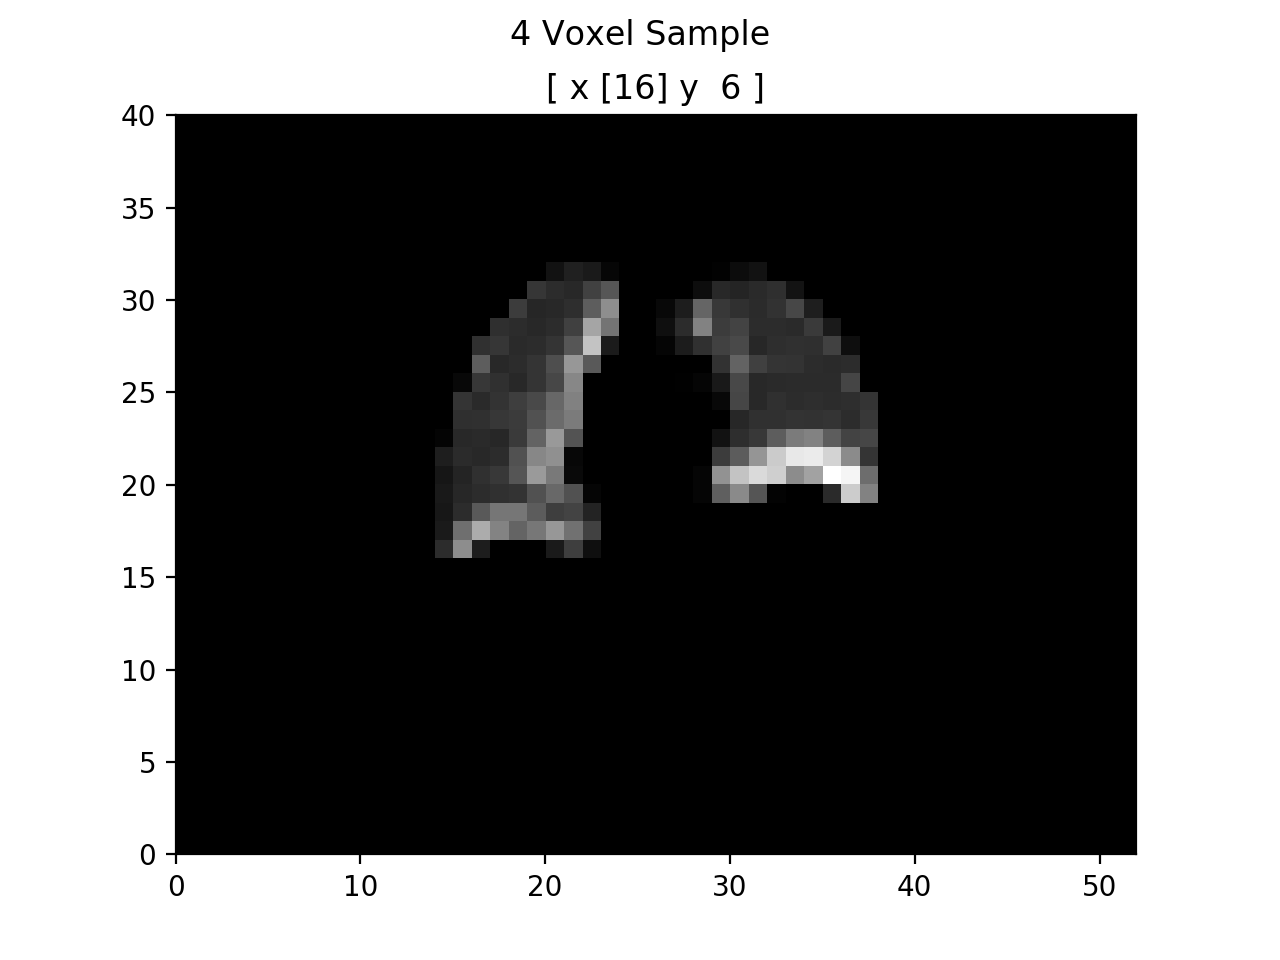

In [23]:
#Plot 4x4x4 voxel sample image
pl.ImagePlot(voxel_sample_4, x=0, title='4 Voxel Sample')

<IPython.core.display.Javascript object>


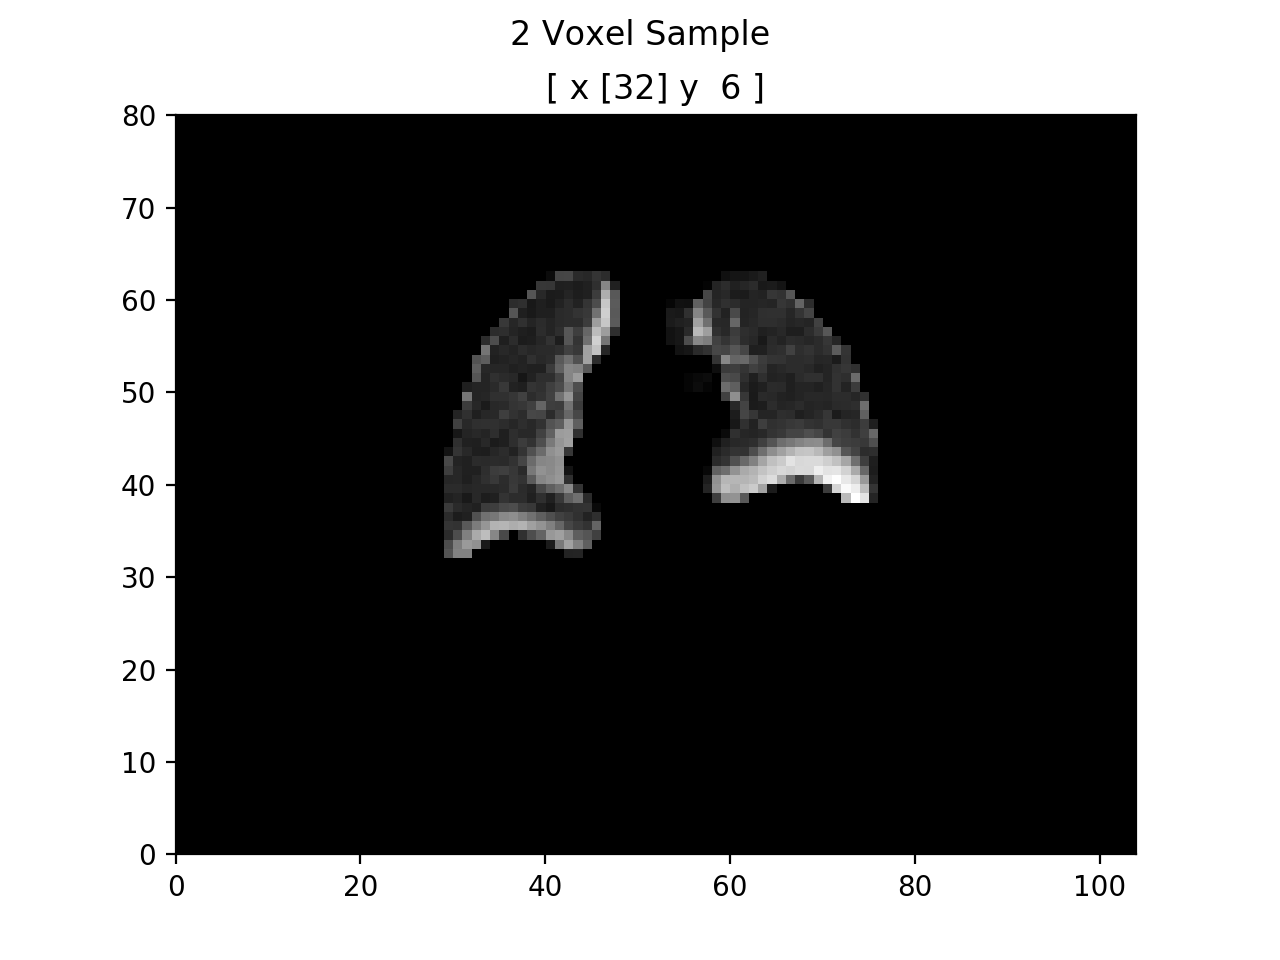

In [24]:
#Plot 2x2x2 voxel sample image
pl.ImagePlot(voxel_sample_2, x=0, title='2 Voxel Sample')